In [42]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

import random
import numpy as np

# For viewing the Tensor Graph. 

from tensorflow.python.summary.writer.writer import FileWriter
from matplotlib import pyplot
%matplotlib inline

# plot the training  accuracy  
import matplotlib.pyplot as plt

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# To view the tensorgraph, we use the TensorBoard. 

%load_ext tensorboard

In [5]:
pip list | grep tensorflow

tensorflow                         2.5.0
tensorflow-estimator               2.5.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
print(tf.__version__)


2.5.0


In [7]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of 
                        # numbers will appear every time. 
                        # sets the graph-level random seed

tf.set_random_seed(42)

In [ ]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

In [10]:
# size of the datsets

print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


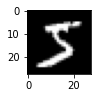

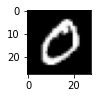

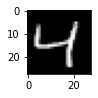

In [11]:
for i in range(3):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(Xtrain[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

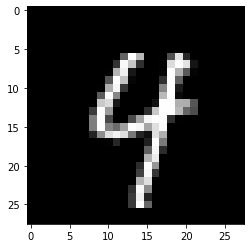

In [13]:
pyplot.imshow(Xtrain[49001], cmap=pyplot.get_cmap('gray'))

In [14]:
Ytrain[49001]

4

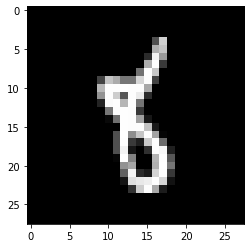

In [16]:
pyplot.imshow(Xtest[5678], cmap=pyplot.get_cmap('gray'))

In [17]:
Ytest[5678]

8

In [18]:
Xtrain[49001].shape

(28, 28)

In [19]:
Xtest[5678].shape

(28, 28)

In [20]:
Xtrain[49001]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [22]:
# Normalize the data
# 60000 input images are in the Xtrain set.
# 10000 input images are in the Xtest set.

Xtrain = Xtrain.reshape(60000, 28*28)    # reshape the input set to size 28*28.

In [23]:
Xtrain[49001].shape

(784,)

In [24]:
Xtrain[49001]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  9

In [25]:
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

In [26]:
Xtrain[49001]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

In [30]:
Xtest[9999].shape

(784,)

In [28]:
Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [31]:
# Create a model object

dnnModel = models.Sequential()

In [32]:
# Layer 1 == input layer == Specify the input size in the first layer.

dnnModel.add(layers.Dense(50, activation='relu', input_shape=(784,)))

In [33]:
# Layer 2 = hidden layer  with Regularizers
dnnModel.add(layers.Dense(60, 
                          activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)) )

In [34]:
# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu'))


In [35]:
# Layer 4 = output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

In [36]:
dnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3060      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 44,450
Trainable params: 44,450
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
dnnModel.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [38]:
# train the model

h = dnnModel.fit( Xtrain, Ytrain, epochs=25, validation_split=0.2, batch_size=64)

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 1s 26us/sample - loss: 0.6769 - acc: 0.8843 - val_loss: 0.2968 - val_acc: 0.9460
Epoch 2/25
   64/48000 [..............................] - ETA: 1s - loss: 0.2951 - acc: 0.9531

/Users/B0218162/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


48000/48000 [==============================] - 1s 17us/sample - loss: 0.2379 - acc: 0.9539 - val_loss: 0.2009 - val_acc: 0.9581
Epoch 3/25
48000/48000 [==============================] - 1s 17us/sample - loss: 0.1705 - acc: 0.9649 - val_loss: 0.1619 - val_acc: 0.9647
Epoch 4/25
48000/48000 [==============================] - 1s 16us/sample - loss: 0.1385 - acc: 0.9704 - val_loss: 0.1438 - val_acc: 0.9678
Epoch 5/25
48000/48000 [==============================] - 1s 20us/sample - loss: 0.1191 - acc: 0.9746 - val_loss: 0.1406 - val_acc: 0.9681
Epoch 6/25
48000/48000 [==============================] - 1s 16us/sample - loss: 0.1053 - acc: 0.9782 - val_loss: 0.1324 - val_acc: 0.9703
Epoch 7/25
48000/48000 [==============================] - 1s 17us/sample - loss: 0.0952 - acc: 0.9798 - val_loss: 0.1277 - val_acc: 0.9702
Epoch 8/25
48000/48000 [==============================] - 1s 17us/sample - loss: 0.0869 - acc: 0.9820 - val_loss: 0.1303 - val_acc: 0.9717
Epoch 9/25
48000/48000 [==============

In [39]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['acc'][-1])

Final training loss 	 0.04007378483315309
Final training accuracy  0.993375


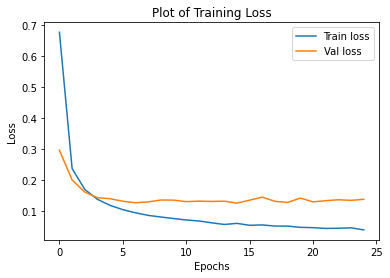

In [43]:
# plot the training loss

plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

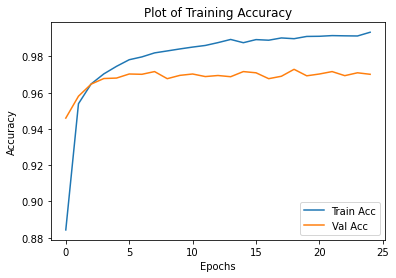

In [44]:
# plot the training accuracy

plt.plot(h.history['acc'], label='Train Acc')
plt.plot(h.history['val_acc'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

In [45]:
# testing the model

testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)

In [46]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.14423731094002723
Testing accuracy  0.9722
